# LIME

In [14]:
from lime.lime_tabular import LimeTabularExplainer
import warnings

Sample index (Non-serious): 243, Actual outcome: Non-serious


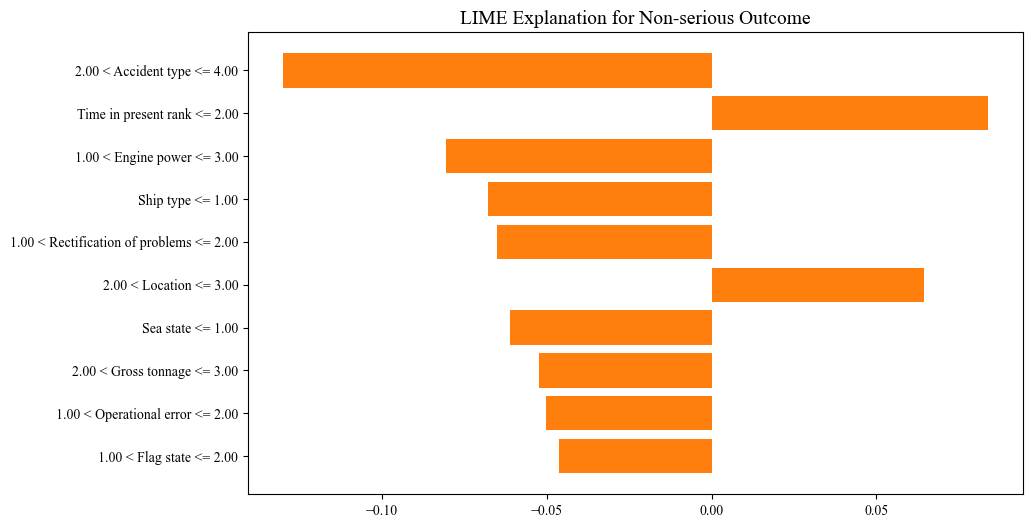

Sample index (Serious): 811, Actual outcome: Serious


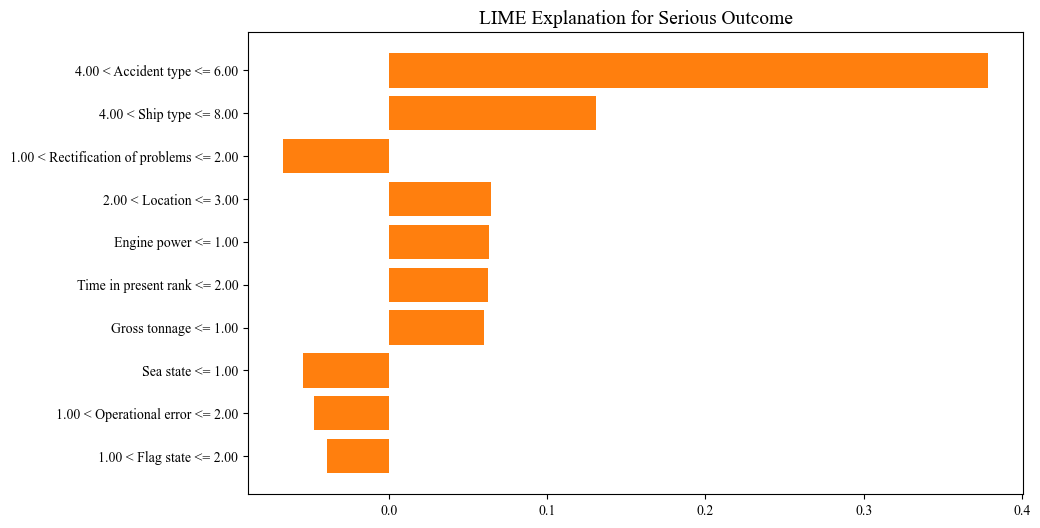

In [21]:
# Ignore warnings
warnings.filterwarnings("ignore", message=".*does not have valid feature names.*")

# Create LIME explainer object
explainer = LimeTabularExplainer(
    training_data=train_x.values,
    feature_names=train_x.columns,
    class_names=['Non-serious', 'Serious'],  # Adjust class names according to your classification task
    mode='classification'
)

# Determine the index of a "Non-serious" sample
non_serious_index = 243
sample_non_serious = test_x.loc[non_serious_index].values.reshape(1, -1)

# Print the actual class of the sample
print(f"Sample index (Non-serious): {non_serious_index}, Actual outcome: Non-serious")

# Use the trained CatBoost model for prediction
catboost_model = best_models["CatBoost"]

# Generate explanation
exp_non_serious = explainer.explain_instance(
    data_row=sample_non_serious.flatten(),
    predict_fn=catboost_model.predict_proba  # Ensure this is your model’s probability prediction function
)

# Generate explanation figure object
fig_non_serious = exp_non_serious.as_pyplot_figure()

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Custom colors
color_negative = '#1f77b4'  # Blue
color_positive = '#ff7f0e'  # Orange

# Assign colors to each bar
for bar in fig_non_serious.axes[0].patches:
    height = bar.get_height()
    # Check bar height and set corresponding color
    if height < 0:  # Negative value
        bar.set_facecolor(color_negative)  
    else:  # Positive value
        bar.set_facecolor(color_positive)  

# Set figure properties
fig_non_serious.set_size_inches(10, 6)  # Adjust to your desired size
plt.title('LIME Explanation for Non-serious Outcome', fontsize=14)  # Add title
# plt.axvline(x=0, color='black', linestyle='--')  # Add zero line
plt.show()  # Display figure in Jupyter

# Determine the index of a "Serious" sample
serious_index = 811
sample_serious = test_x.loc[serious_index].values.reshape(1, -1)

# Print the actual class of the sample
print(f"Sample index (Serious): {serious_index}, Actual outcome: Serious")

# Generate explanation
exp_serious = explainer.explain_instance(
    data_row=sample_serious.flatten(),
    predict_fn=catboost_model.predict_proba  # Ensure this is your model’s probability prediction function
)

# Generate explanation figure object
fig_serious = exp_serious.as_pyplot_figure()

# Assign colors to each bar
for bar in fig_serious.axes[0].patches:
    height = bar.get_height()
    # Check bar height and set corresponding color
    if height < 0:  # Negative value
        bar.set_facecolor(color_negative)  
    else:  # Positive value
        bar.set_facecolor(color_positive)  

# Set figure properties
fig_serious.set_size_inches(10, 6)  # Adjust to your desired size
plt.title('LIME Explanation for Serious Outcome', fontsize=14)  # Add title
# plt.axvline(x=0, color='black', linestyle='--')  # Add zero line
plt.show()  # Display figure in Jupyter
